## Задание 1

Попробуйте получить доступ к https://gemini.google.com/ и https://huggingface.co/chat/ . Возможно вам понадобится создать там аккаунт и использовать vpn. Если у вас получилось, то приложите скришоноты запросов (в обе модели). Если вы постарались и у вас не получилось, то опишите, что вы попробовали и какая у вас была ошибка. 

Gemini

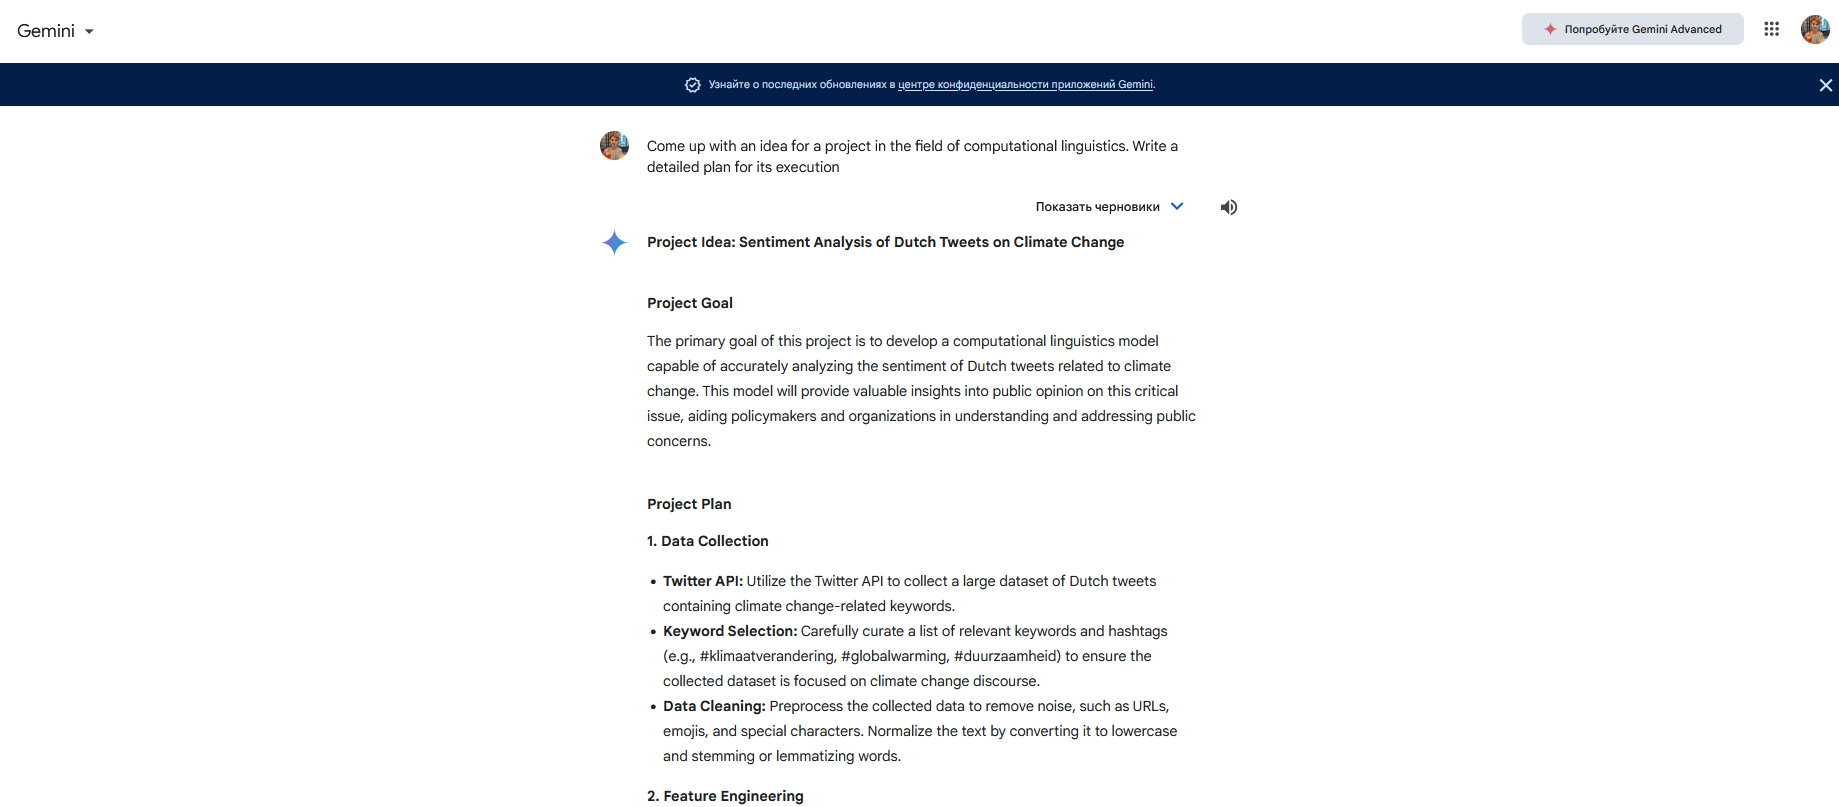

Hugging Face

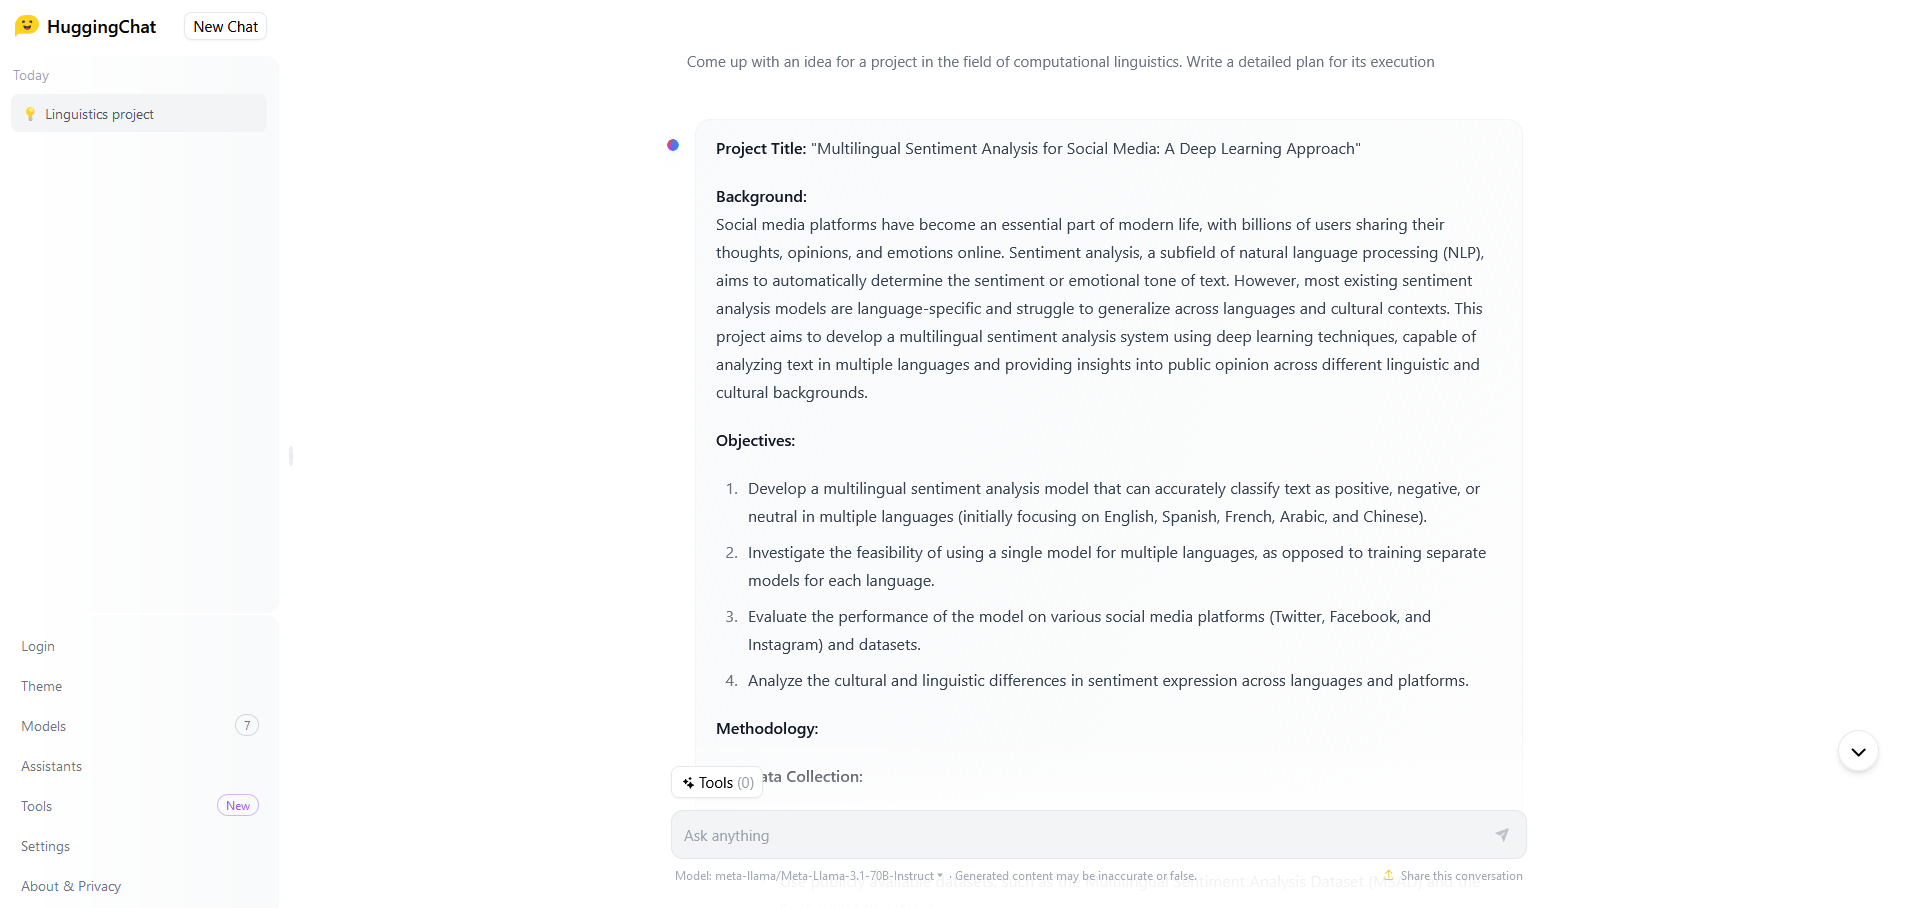

## Задание 2

Используя OpenAI API попробуйте сделать следующие вещи:

1) Попробуйте воспроизвести частеречную разметку с помощью gpt-4o-mini. Для данного предложения попробуйте получить точно такую же разметку.
   Если не работает, то попробуйте добавить примеров из opencorpora (не добавляя этот пример). Если у вас сработало это предложение, то попробуйте любое другое и оцените насколько промпт обобщает.  
   !Не размечайте большое количество предложений в датасете и не рассчитывайте метрики качества, оценивайте только вручную

In [2]:
sentence = "Великолепная «Школа злословия» вернулась в эфир после летних каникул в новом формате."
sentence_pos = [['Великолепная', 'ADJF'],
 ['«', 'PNCT'],
 ['Школа', 'NOUN'],
 ['злословия', 'NOUN'],
 ['»', 'PNCT'],
 ['вернулась', 'VERB'],
 ['в', 'PREP'],
 ['эфир', 'NOUN'],
 ['после', 'PREP'],
 ['летних', 'ADJF'],
 ['каникул', 'NOUN'],
 ['в', 'PREP'],
 ['новом', 'ADJF'],
 ['формате', 'NOUN'],
 ['.', 'PNCT']]

In [3]:
from openai import OpenAI
client = OpenAI(api_key=key)

In [8]:
query = "Великолепная «Школа злословия» вернулась в эфир после летних каникул в новом формате."

In [10]:
messages = [{"role": "user", "content": query}]

In [ ]:
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages
)

PermissionDeniedError: Error code: 403 - {'error': {'code': 'unsupported_country_region_territory', 'message': 'Country, region, or territory not supported', 'param': None, 'type': 'request_forbidden'}}

Будем писать запросы боту в телеграме, потому что 'unsupported_country_region_territory'

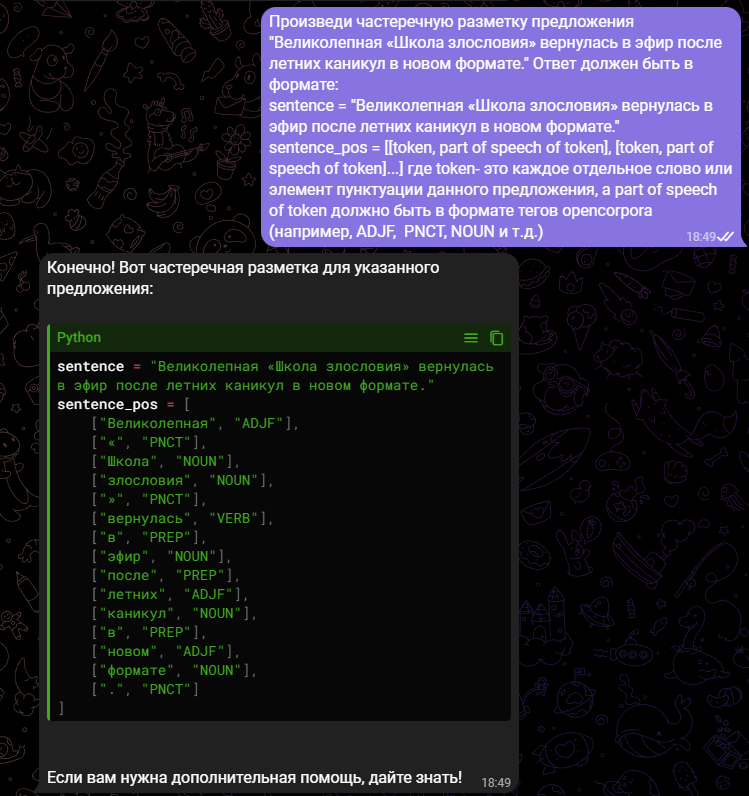

In [3]:

sentence_pos_bot = [
    ["Великолепная", "ADJF"],
    ["«", "PNCT"],
    ["Школа", "NOUN"],
    ["злословия", "NOUN"],
    ["»", "PNCT"],
    ["вернулась", "VERB"],
    ["в", "PREP"],
    ["эфир", "NOUN"],
    ["после", "PREP"],
    ["летних", "ADJF"],
    ["каникул", "NOUN"],
    ["в", "PREP"],
    ["новом", "ADJF"],
    ["формате", "NOUN"],
    [".", "PNCT"]
]

sentence_pos_bot == sentence_pos

True

2) попробуйте попросить модель написать решение к заданию из 3 домашки, где вам нужно было имплементировать алгоритм Леска. Если сразу не получается, то попробуйте улучшить промпт/добавить примеры использования нужных библиотек и т.п. Попробуйте получить рабочий код и проверить его на нескольких предложениях. Если код выдает ошибку, то попробуйте использовать API как чат (можете взять функцию dialog их семинара) и отправьте ошибку вторым сообщением (и так далее пока не сработает или вам не надоест)

3) проверьте насколько gpt-4o знакома с лингвистикой. Задайте как минимум 5 лингвистических вопросов и посмотрите, что получается. Желательно использовать очень специфичные и сложные вопросы. 

Запрос был следующий: "Напиши мне на питоне код с использованием алгоритма Леска для нахождения значений слов"

In [4]:
import nltk
from nltk.corpus import wordnet as wn
from collections import defaultdict

# Убедитесь, что у вас загружены необходимые ресурсы
nltk.download('wordnet')
nltk.download('punkt')

def lesk(word, context_sentence):
    # Получаем все возможные значения слова
    senses = wn.synsets(word)
    
    # Если нет значений, возвращаем None
    if not senses:
        return None
    
    # Разбиваем контекстное предложение на слова
    context_words = set(nltk.word_tokenize(context_sentence.lower()))
    
    # Словарь для хранения количества пересечений
    overlaps = defaultdict(int)

    # Для каждого значения слова
    for sense in senses:
        # Получаем определения и примеры использования
        definition = sense.definition()
        examples = sense.examples()
        
        # Объединяем определения и примеры в один текст
        text = definition + ' ' + ' '.join(examples)
        
        # Разбиваем текст на слова
        text_words = set(nltk.word_tokenize(text.lower()))
        
        # Находим пересечение с контекстом
        overlap = context_words.intersection(text_words)
        
        # Сохраняем количество пересечений
        overlaps[sense] += len(overlap)

    # Находим значение с максимальным количеством пересечений
    best_sense = max(overlaps, key=overlaps.get, default=None)
    
    return best_sense

# Пример использования
word = "bank"
context_sentence = "He went to the bank to deposit money."
best_sense = lesk(word, context_sentence)

if best_sense:
    print(f"Best sense for '{word}': {best_sense.name()} - {best_sense.definition()}")
else:
    print(f"No sense found for '{word}'.")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


Best sense for 'bank': depository_financial_institution.n.01 - a financial institution that accepts deposits and channels the money into lending activities


In [5]:
word = "accident"
context_sentence = "The sign was damaged in an accident."
best_sense = lesk(word, context_sentence)


if best_sense:
    print(f"Best sense for '{word}': {best_sense.name()} - {best_sense.definition()}")
else:
    print(f"No sense found for '{word}'.")

Best sense for 'accident': accident.n.02 - anything that happens suddenly or by chance without an apparent cause


Были заданы следующие вопросы:

1. Расскажи мне про билингвизм у детей, у которых родители говорят на разных языках, кратко
2. Каковы основные различия между синтаксисом и морфологией в языках мира? Кратко
3. Расскажи про гипотезу Сепира-Уорфа кратко
4. Какую систему машинного перевода порекомендуешь? Кратко
5. Расскажи кратко и лаконично про теорию формальных грамматик Хомского

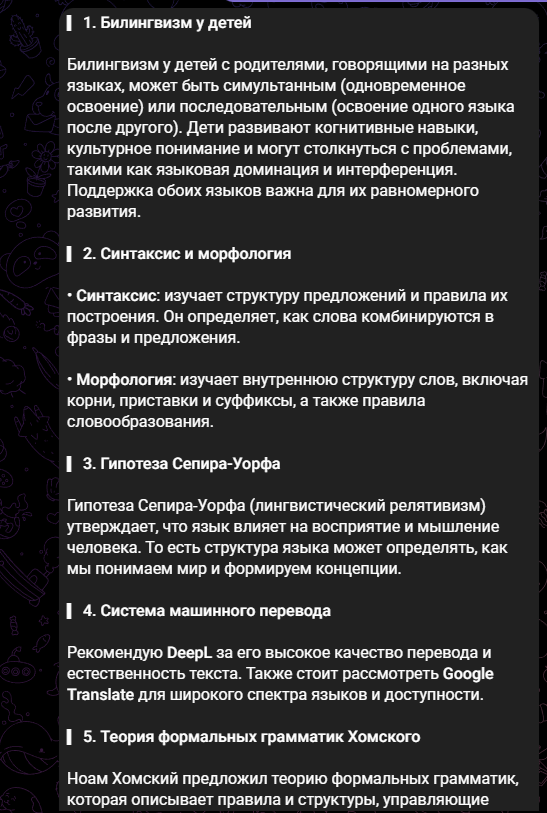

## Задание 3

Запустите `meta-llama/Llama-3.2-1B-Instruct` в колабе (заранее получив одобрение от меты и создав ключ в huggingface) также как я делал в семинаре. Попробуйте сделать следующие вещи:

1) Перевести предложение (любое, но желательно сложное для автоперевода) с английского на русский
2) возьмите небольшой текст с википедии (около 100 слов) и попросите модель саммаризовать его 1 предложением
3) попробуйте найти дату, которой ограничивается обучающая выборка - спросите несколько простых привязанных ко времени фактов (кто сейчас президент США, какое сейчас время года, что случилось в прошлом месяце). Спрашивайте на английском, если ответы совсем не имеет смысла. 

Ллама не работает, буду разговаривать с Яндексом

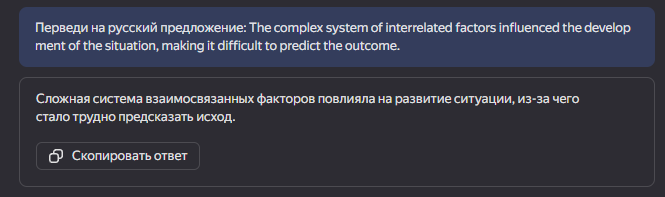

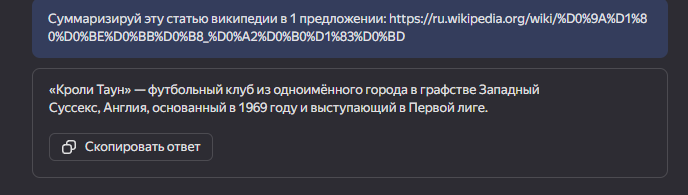

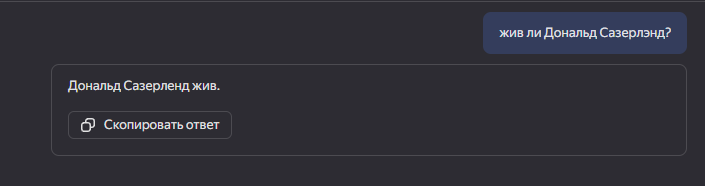

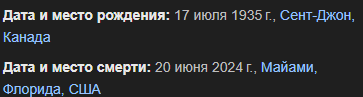

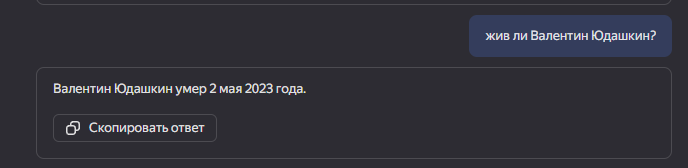

Ориентировочно он владеет информацией не позднее 23 года